In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv(r"C:\Users\R\Desktop\MASAI\PROJECT\P2_Car price prediction model\Datasets (in csv)\cleaned-&-prepared-data-for-model.csv")
df.head()

,manufacturer,brand,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,Hyundai,Hyundai Elite i20 Asta 1.2 (O),2018,34,19.800,5.0,Petrol,Manual,170.0,285.0,45.0,82.00,6.65
1,Hyundai,Hyundai Creta SX IVT Petrol,2021,19,19.365,5.0,Petrol,Automatic,190.0,433.0,50.0,88.51,15.24
2,Hyundai,Hyundai Creta 1.6 SX,2019,51,19.365,5.0,Diesel,Manual,170.0,400.0,55.0,126.00,11.88
3,Hyundai,Hyundai Grand i10 Sportz 1.2 Kappa VTVT,2015,44,18.900,5.0,Petrol,Manual,165.0,350.0,43.0,81.00,4.06
4,Renault,Renault Kwid 1.0 RXL,2021,12,21.700,5.0,Petrol,Manual,184.0,279.0,28.0,67.00,3.75


In [3]:
df.shape

(1394, 13)

# DROPING IRRELEVANT COLUMNS | ENCODING | SCALING

In [4]:
df.drop(['brand','manufacturer'], axis = 1, inplace = True)

In [5]:
df.head(2)

,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type,transmission,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,2018,34,19.800,5.0,Petrol,Manual,170.0,285.0,45.0,82.00,6.65
1,2021,19,19.365,5.0,Petrol,Automatic,190.0,433.0,50.0,88.51,15.24


In [6]:
cat = []
num = []

for i in df.columns:
    if df[i].dtypes == "O":
        cat.append(i)
    else:
        num.append(i)

In [7]:
cat

['fuel_type', 'transmission']

In [8]:
df = pd.get_dummies(data = df, columns= cat)

In [9]:
df = df[['model (year)','km driven (in thousands)','mileage (in kmpl)','seating capacity (units)', 'fuel_type_Petrol','fuel_type_Diesel','fuel_type_Petrol+cng', 'transmission_Automatic', 'transmission_Manual','ground clearance (in mm)', 'boot space (in litres)','fuel tank capacity (in litres)', 'max power (in bhp)', 'price (in ₹)']]

In [10]:
df.head()

,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type_Petrol,fuel_type_Diesel,fuel_type_Petrol+cng,transmission_Automatic,transmission_Manual,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,2018,34,19.800,5.0,1,0,0,0,1,170.0,285.0,45.0,82.00,6.65
1,2021,19,19.365,5.0,1,0,0,1,0,190.0,433.0,50.0,88.51,15.24
2,2019,51,19.365,5.0,0,1,0,0,1,170.0,400.0,55.0,126.00,11.88
3,2015,44,18.900,5.0,1,0,0,0,1,165.0,350.0,43.0,81.00,4.06
4,2021,12,21.700,5.0,1,0,0,0,1,184.0,279.0,28.0,67.00,3.75


# OUTLIER ANALYSIS

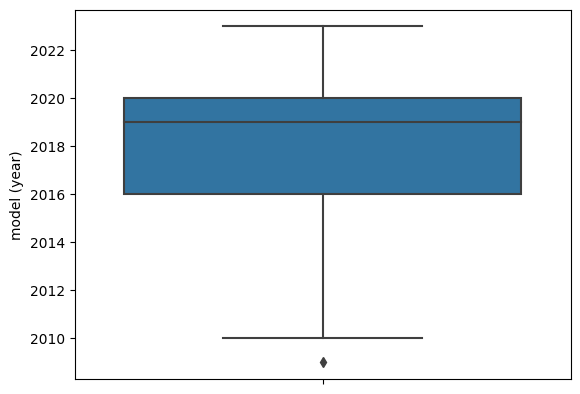

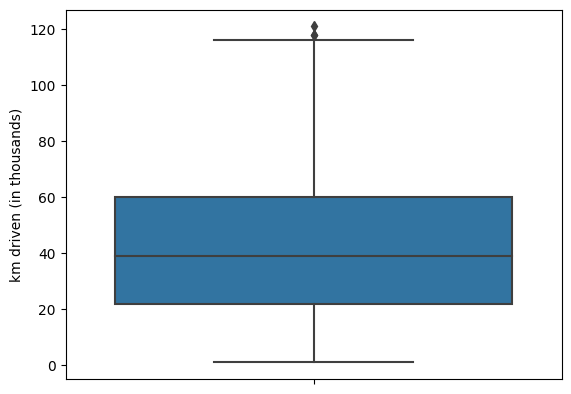

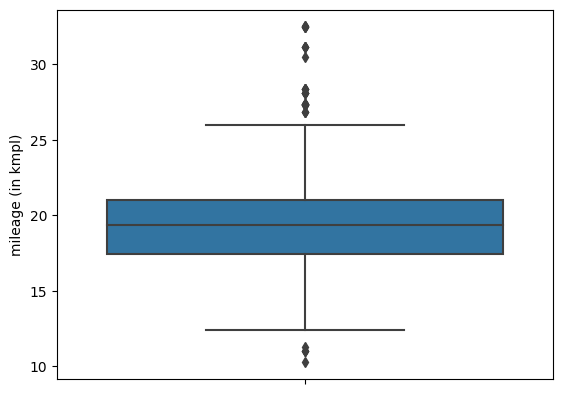

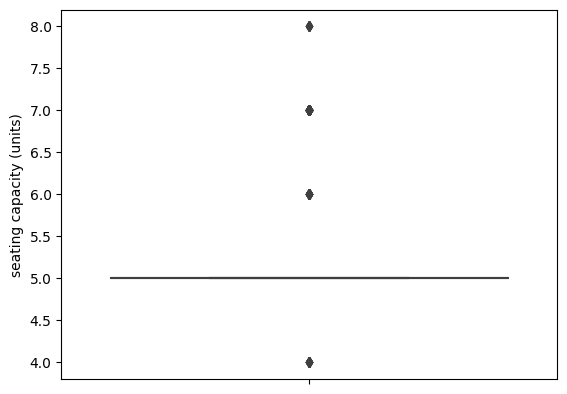

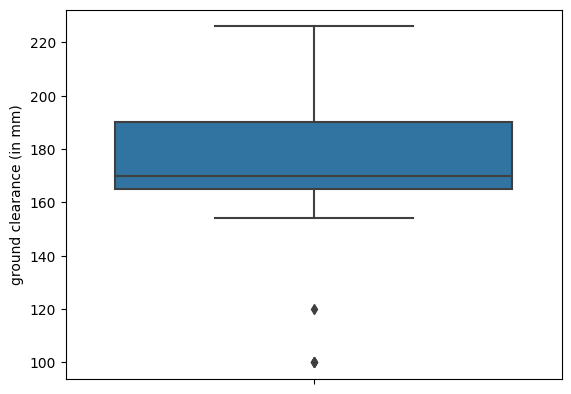

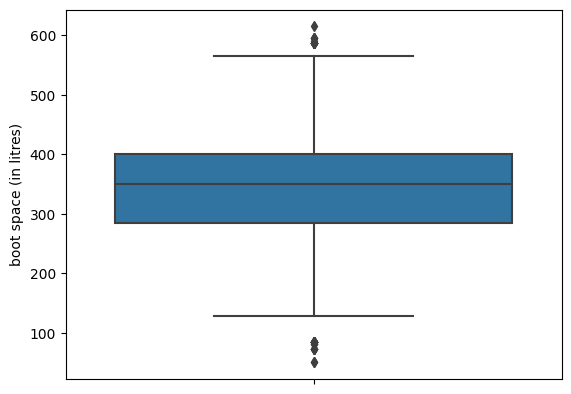

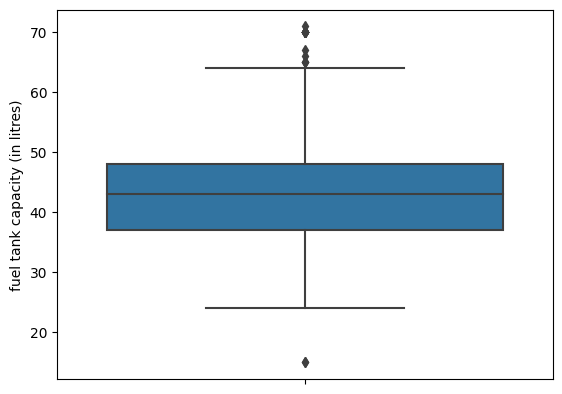

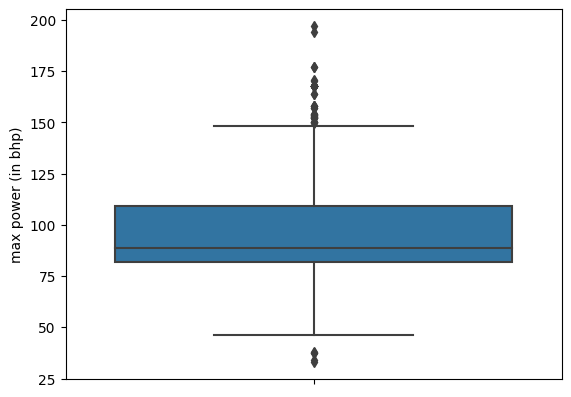

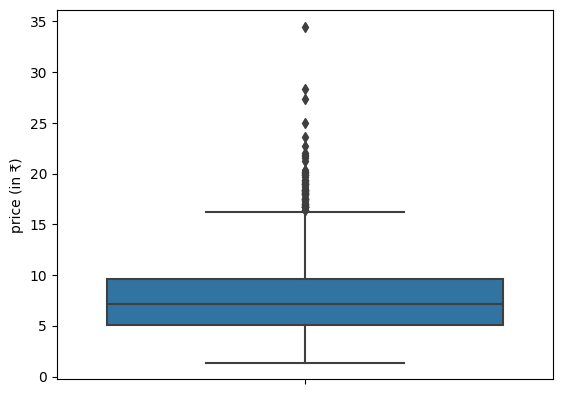

In [11]:
for i in num:
    sns.boxplot(df[num], y = i)
    plt.show()

We can remove outliers from the above features except the seating capacity column (which is more like a categorical feature)

In [12]:
num

['model (year)',
 'km driven (in thousands)',
 'mileage (in kmpl)',
 'seating capacity (units)',
 'ground clearance (in mm)',
 'boot space (in litres)',
 'fuel tank capacity (in litres)',
 'max power (in bhp)',
 'price (in ₹)']

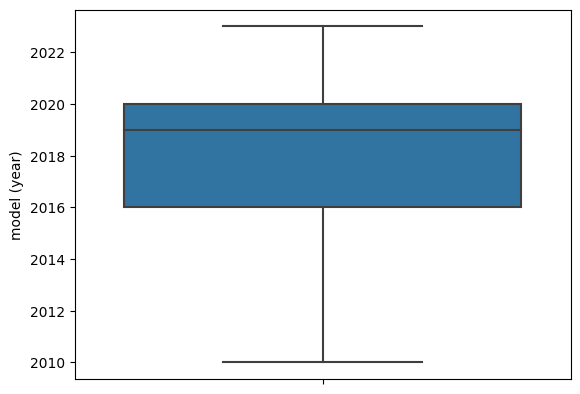

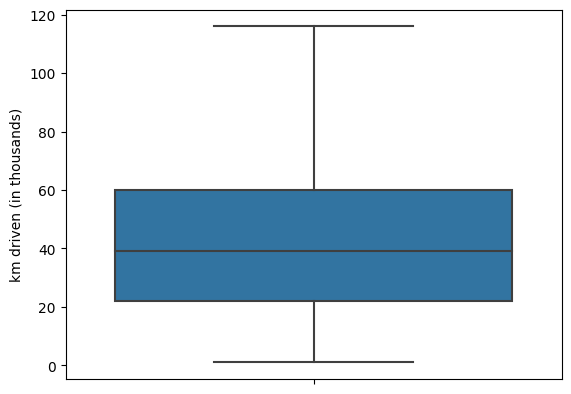

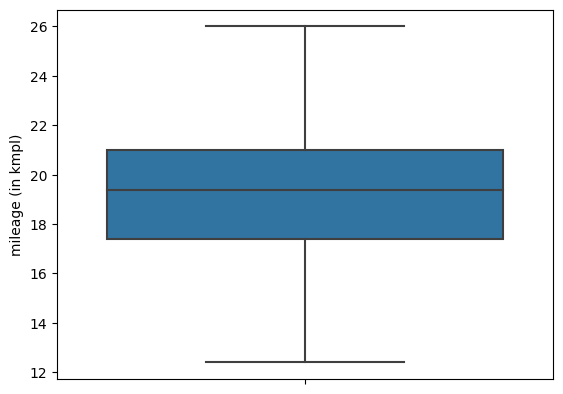

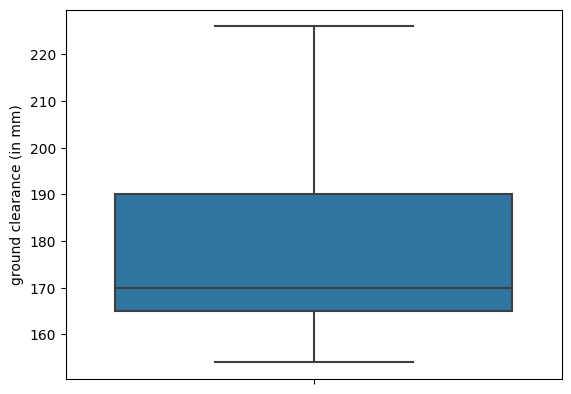

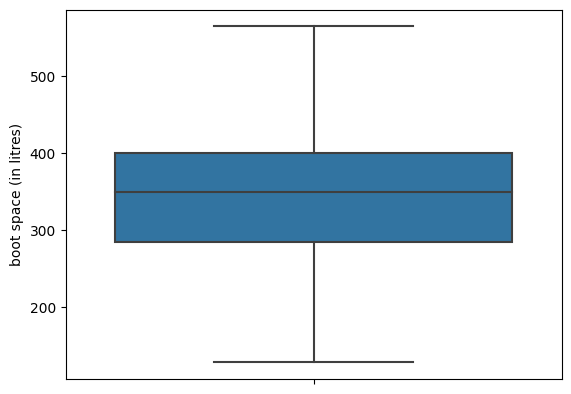

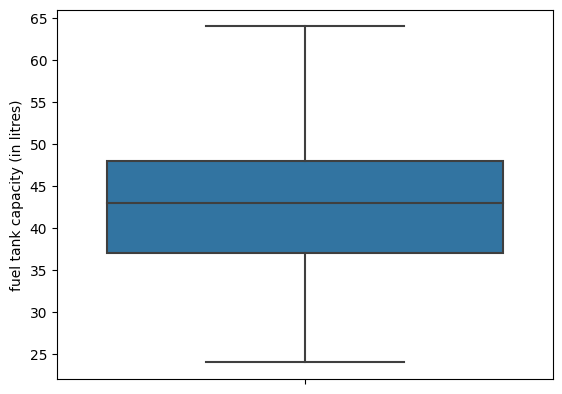

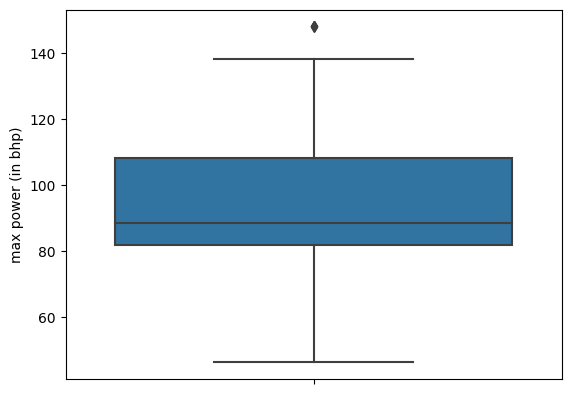

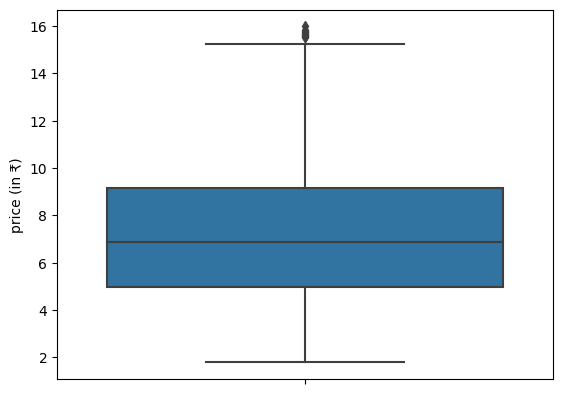

In [13]:
out = ['model (year)','km driven (in thousands)','mileage (in kmpl)','ground clearance (in mm)','boot space (in litres)',
       'fuel tank capacity (in litres)','max power (in bhp)','price (in ₹)']

for i in out:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    ul = q3 + 1.5*iqr
    ll = q1 - 1.5*iqr
    df = df[(df[i]<=ul) & (df[i]>=ll)]
    sns.boxplot(df[out], y = i)
    plt.show()

In [14]:
df.shape

(1225, 14)

### SCALING

In [15]:
# num

In [16]:
# num.remove('price (in ₹)')

In [17]:
# sc = StandardScaler()

In [18]:
# df[num] = sc.fit_transform(df[num])

In [19]:
# df.head(2)

### ANALYSING CORRELATION BETWEEN DIFFERENT FEATURES

<AxesSubplot: >

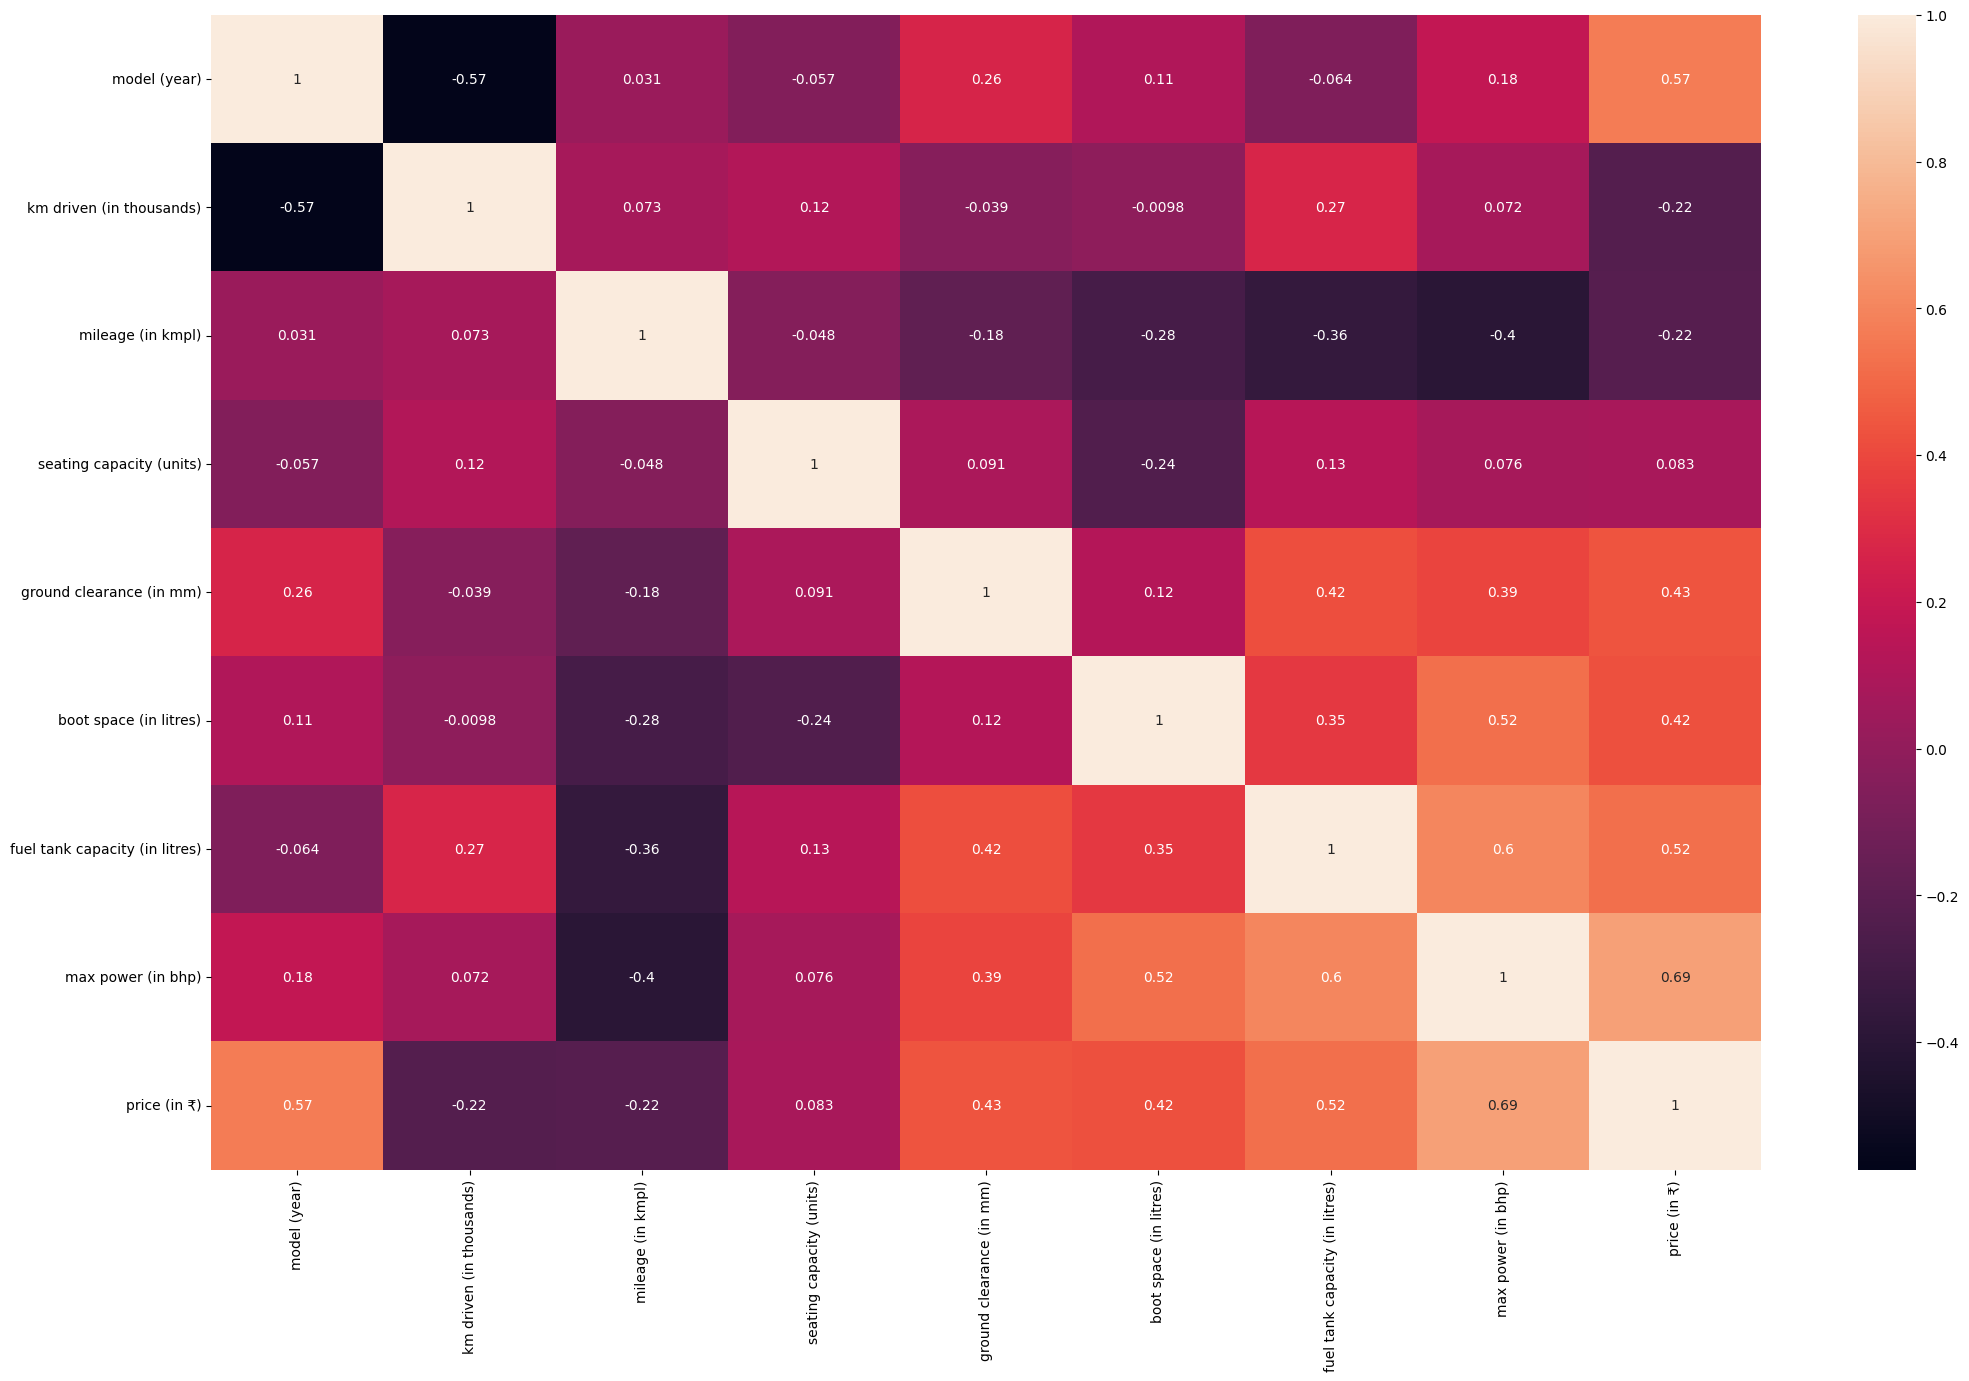

In [20]:
plt.figure(figsize=(25,15))
sns.heatmap(df[num].corr(), annot=True)

In [21]:
# sns.pairplot(df[num], diag_kind='kde')

It is clearly visible with the help of these plots that no two features are highly correlated with each other. This will help us building a better model.

# MODEL PREPARATION

In [22]:
x = df.drop('price (in ₹)', axis=1)
y = df['price (in ₹)']

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [24]:
lr = LinearRegression()

In [25]:
lr.fit(x_train, y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
lr.coef_

array([ 4.74792501e-01, -1.51823610e-02, -3.38903274e-04,  4.02838757e-01,
       -3.72278141e-01,  6.75668302e-01, -3.03390161e-01,  5.51333946e-01,
       -5.51333946e-01, -3.80889252e-03,  3.13697327e-03,  1.18864074e-01,
        5.51639945e-02])

In [28]:
lr.intercept_

-962.2479328620092

## EVALUATING THE MODEL

### Mean Squared Error

In [29]:
mse = metrics.mean_squared_error(y_test, y_pred)
mse

1.664593525837367

### Root Mean Squared Error

In [30]:
rmse = np.sqrt(mse)
rmse

1.2901912749035962

### R2 Score or Coefficient of Determination

In [31]:
r2_score = metrics.r2_score(y_test, y_pred)
r2_score

0.8025000802868859

### Adjusted R2 Score

Adjusted R² = 1 - [(1 - R²) * (n - 1) / (n - p - 1)]

Where:

* R² is the regular R-squared score
* n refers to the number of observations/records in the training dataset (or the sample size)
* p represents the number of predictors or independent variables in the model

In [32]:
n = x_train.shape[0]
n

857

In [33]:
p = x_train.shape[1]
p

13

In [34]:
adjusted_r2_score = 1 - ((1 - r2_score)*(n-1)/(n-p-1))
adjusted_r2_score

0.7994544112996137

## OUR MODEL IS PERFORMING WELL! HURREY!!!

### Now, let's apply our model in a real life scenario by predicting price of a used car based on desired features to be provided as input to the model

In [35]:
df.head(1)

,model (year),km driven (in thousands),mileage (in kmpl),seating capacity (units),fuel_type_Petrol,fuel_type_Diesel,fuel_type_Petrol+cng,transmission_Automatic,transmission_Manual,ground clearance (in mm),boot space (in litres),fuel tank capacity (in litres),max power (in bhp),price (in ₹)
0,2018,34,19.8,5.0,1,0,0,0,1,170.0,285.0,45.0,82.0,6.65


## Predicting price of a used car having:
* model (year) = 2016
* km driven (in thousands) = not more than 60k
* mileage (in kmpl) = at least 18 kmpl
* seating capacity (units) = 5
* fuel_type_ Petrol = yes
* fuel_type_ Diesel = no
* fuel_type_ Petrol+cng = no
* transmission_ Automatic = no
* transmission_ Manual = yes
* ground clearance (in mm) = not less than 180 mm
* boot space (in litres) = at least 350 litres
* fuel tank capacity (in litres) = 35 litres is enough
* max power (in bhp) = 120 bhp

In [36]:
lr.predict([[2016,60,18,5,1,0,0,0,1,190,350,35,120]])

C:\Users\R\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([6.26146275])

A used car having the above desired features and details will cost a buyer around ₹7.3 lakhs.

### This model can also be used by sellers (1st/2nd/3rd owners) to get an idea of prices they can expect

# _______________________________________THANKS___________________